<div style="background-color:#e0f7fa; border-left: 8px solid #00796b; padding: 20px; margin: 20px 0; border-radius: 8px;">
    <h1 style="text-align:center; color:#004d40; font-size: 28px; margin-bottom: 10px;">Workshop 3: Decision Tree Classification</h1>
    <h3 style="text-align:center; color:#00695c;">June 29, 2025</h3>
    <hr style="border-top: 1px solid #004d40;">
    <p style="font-size: 16px; line-height: 1.5; color:#333;">
    In this assignment, we will use a <b>Decision Tree model</b> to perform classification. A decision tree works by splitting the data based on feature values to make predictions, forming a tree-like structure. It is simple to understand, easy to visualize, and useful for making clear decisions. However, it can overfit the data if the tree becomes too complex, so careful evaluation is needed to ensure good performance on new data.
    </p>
    <p style="font-size: 16px; color:#555;"><b>Contributors:</b> Sanuja Vihanga Senadeera, Naveen Karan Krishna, Thi Anh Tram Le, Mayra Geraldine Reinoso Varon, Justin Kyle Pedro</p>
</div>

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

Markdown with this color is the explanation of code

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;">

Markdown with this color is the explanation/interpretation of result

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">1. Import Libraries</h2>
</div>

In [231]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,roc_curve,auc

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code imports libraries needed for data analysis, visualization, and machine learning:

- `pandas`: For handling and manipulating tabular data.

- `seaborn` and `matplotlib.pyplot`: For creating attractive visualizations and plots to understand patterns and results.

- accuracy_score and mean_squared_error:

    - `accuracy_score`: Measures how many predictions were correct in classification tasks.

    - `mean_squared_error`: Measures prediction error, mainly in regression.

- `LabelEncoder`: Converts text labels (like "Male", "Female") into numbers for machine learning models.

- `train_test_split`: Splits the dataset into training and test parts to build and evaluate models properly.

- DecisionTreeClassifier and plot_tree:

    - `DecisionTreeClassifier`: Builds a decision tree model to classify data.

    - `plot_tree`: Draws the decision tree for visual understanding.

- confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc:

    - `confusion_matrix`: Shows counts of correct and incorrect predictions.

    - `precision_score`: Tells what percentage of positive predictions were correct.

    - `recall_score`: Tells what percentage of actual positives were correctly predicted.

    - `f1_score`: Combines precision and recall into one balanced score.

    - `roc_curve`: Helps visualize the model's ability to distinguish between classes.

    - `auc`: A single score that summarizes the ROC curve.

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">2. Data Partitions</h2>
</div>

## 2.1 Loading Data

In [236]:
#loading data
ret_df = pd.read_csv('Retention.csv')

# Check the first few rows
ret_df.head()

,Att_hrs_fall,GENDER,HIGH_SCHOOL_PERCENTILE,AGE,Att_hrs_spr,Avg_income,Distance,Dropped_course,Major_rate,SAT,...,Legacynum,Stu_worker_ind,Need_pct_met,Perc_hrs_comp_fall,Hs_rate,Dorm_rate,Instate,Transcrip,Fall_GPA,Target
0,13,F,97.0,18.91,15,30573.0,5.083094,0,0.821782,1160,...,0,0,1.000000,1.0,0.812500,0.8,1,0,3.307692,0
1,14,M,97.0,18.04,15,27305.0,2.198764,0,0.795455,1050,...,0,0,0.977366,1.0,1.000000,0.8,1,1,2.821429,0
2,15,M,83.0,18.16,15,30573.0,5.083094,0,0.843750,1140,...,1,0,0.913965,1.0,0.812500,0.8,1,0,3.133333,0
3,14,M,92.0,18.59,12,35865.0,3.245574,0,NaN,1090,...,0,1,1.000000,1.0,0.847826,0.8,1,0,2.678571,0
4,16,F,80.0,18.88,16,40125.0,19.486585,0,0.840391,1150,...,0,1,1.000000,1.0,0.875000,0.8,1,0,2.500000,0


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code performs the following:

- **Loads** the dataset from the file `"Retention.csv"` into a DataFrame named `df` using `pandas`.

- **Displays** the first five rows of the dataset using `df.head()` to preview its structure and content.

### 2.1.1 Inspect the Dataframe

In [240]:
#Inspecting data
ret_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2626 entries, 0 to 2625
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Att_hrs_fall            2626 non-null   int64  
 1   GENDER                  2626 non-null   object 
 2   HIGH_SCHOOL_PERCENTILE  2363 non-null   float64
 3   AGE                     2626 non-null   float64
 4   Att_hrs_spr             2626 non-null   int64  
 5   Avg_income              2469 non-null   float64
 6   Distance                2528 non-null   float64
 7   Dropped_course          2626 non-null   int64  
 8   Major_rate              2547 non-null   float64
 9   SAT                     2626 non-null   int64  
 10  Extra_curr              2626 non-null   int64  
 11  Legacynum               2626 non-null   int64  
 12  Stu_worker_ind          2626 non-null   int64  
 13  Need_pct_met            2626 non-null   float64
 14  Perc_hrs_comp_fall      2626 non-null   

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code uses `ret_df.info()` to inspect the DataFrame:

- Displays the **number of rows and columns**.

- Lists each column with its **data type** and **non-null count**.

- Helps check for **missing values**, data types, and overall structure of `ret_df`.

### 2.1.2 Converting Categorical Variables (Gender) to Numeric

In [244]:
# Encoding gender column
le = LabelEncoder()

# Apply to the column with strings
ret_df['GENDER'] = le.fit_transform(ret_df['GENDER'])

#Checking the change
ret_df.head()

,Att_hrs_fall,GENDER,HIGH_SCHOOL_PERCENTILE,AGE,Att_hrs_spr,Avg_income,Distance,Dropped_course,Major_rate,SAT,...,Legacynum,Stu_worker_ind,Need_pct_met,Perc_hrs_comp_fall,Hs_rate,Dorm_rate,Instate,Transcrip,Fall_GPA,Target
0,13,0,97.0,18.91,15,30573.0,5.083094,0,0.821782,1160,...,0,0,1.000000,1.0,0.812500,0.8,1,0,3.307692,0
1,14,1,97.0,18.04,15,27305.0,2.198764,0,0.795455,1050,...,0,0,0.977366,1.0,1.000000,0.8,1,1,2.821429,0
2,15,1,83.0,18.16,15,30573.0,5.083094,0,0.843750,1140,...,1,0,0.913965,1.0,0.812500,0.8,1,0,3.133333,0
3,14,1,92.0,18.59,12,35865.0,3.245574,0,NaN,1090,...,0,1,1.000000,1.0,0.847826,0.8,1,0,2.678571,0
4,16,0,80.0,18.88,16,40125.0,19.486585,0,0.840391,1150,...,0,1,1.000000,1.0,0.875000,0.8,1,0,2.500000,0


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code encodes the `'GENDER'` column from text to **numeric format** using `LabelEncoder`:

- Converts categories like `"Male"` and `"Female"` to numbers (`Male = 1`, `Female = 0`).

- Updates the `ret_df['GENDER']` column with the encoded values.

- Displays the first few rows with `.head()` to verify the change.

### 2.1.3 Checking Missing values

In [248]:
#Cheking missing values and shape of the dataframe
print("Initial shape:", ret_df.shape)
print(ret_df.isna().sum())

Initial shape: (2626, 21)
Att_hrs_fall                0
GENDER                      0
HIGH_SCHOOL_PERCENTILE    263
AGE                         0
Att_hrs_spr                 0
Avg_income                157
Distance                   98
Dropped_course              0
Major_rate                 79
SAT                         0
Extra_curr                  0
Legacynum                   0
Stu_worker_ind              0
Need_pct_met                0
Perc_hrs_comp_fall          0
Hs_rate                   805
Dorm_rate                   0
Instate                     0
Transcrip                   0
Fall_GPA                    0
Target                      0
dtype: int64


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code checks the dataset `ret_df` for:

- Its **initial shape** (number of rows and columns).

- The **number of missing values** in each column using `isna().sum()`.

### 2.1.4 Imputing data due to missing values

In [252]:
# making a copy to keep the original dataframe
df_imputed = ret_df.copy()  

#Imputing missing values based on the median
cols_to_impute = ['HIGH_SCHOOL_PERCENTILE', 'Avg_income', 'Distance', 'Major_rate', 'Hs_rate']

for col in cols_to_impute:
    median_val = df_imputed[col].median()
    df_imputed[col] = df_imputed[col].fillna(median_val)

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code fills missing values in selected numeric columns using the median:

- First, it creates a **copy** of the original DataFrame `ret_df` to preserve the original.

- Then, for each column in `cols_to_impute`, it:

    - Calculates the **median** value.

    - Replaces any missing `(NaN)` values in that column with the median.

Using the median is helpful to reduce the impact of outliers during imputation.

In [255]:
#Cheking missing values after imputation
print("Initial shape:", df_imputed.shape)
print(df_imputed.isna().sum())

Initial shape: (2626, 21)
Att_hrs_fall              0
GENDER                    0
HIGH_SCHOOL_PERCENTILE    0
AGE                       0
Att_hrs_spr               0
Avg_income                0
Distance                  0
Dropped_course            0
Major_rate                0
SAT                       0
Extra_curr                0
Legacynum                 0
Stu_worker_ind            0
Need_pct_met              0
Perc_hrs_comp_fall        0
Hs_rate                   0
Dorm_rate                 0
Instate                   0
Transcrip                 0
Fall_GPA                  0
Target                    0
dtype: int64


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code verifies that missing values have been handled:

- Prints the **shape** of the imputed DataFrame (`df_imputed`) to confirm no rows/columns were lost.

- Displays the **count of remaining missing values** in each column using `.isna().sum()`.

If imputation was successful, the output should show **zero missing values** in the specified columns.

### 2.1.5 Checking Basic Statistics

In [259]:
#Checking basic statistics
df_imputed.describe()

,Att_hrs_fall,GENDER,HIGH_SCHOOL_PERCENTILE,AGE,Att_hrs_spr,Avg_income,Distance,Dropped_course,Major_rate,SAT,...,Legacynum,Stu_worker_ind,Need_pct_met,Perc_hrs_comp_fall,Hs_rate,Dorm_rate,Instate,Transcrip,Fall_GPA,Target
count,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,...,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000
mean,14.612719,0.397563,79.783016,18.553679,14.865956,58252.207921,255.965920,0.071592,0.836303,1178.313024,...,0.311500,0.119954,0.917301,0.935889,0.838573,0.836195,0.815689,0.564356,2.946933,0.127190
std,1.389914,0.489487,18.551756,0.584624,1.625372,22788.147910,338.140575,0.324575,0.021422,133.072450,...,0.463195,0.324970,0.245779,0.158619,0.119307,0.022936,0.387811,0.495935,0.811767,0.333249
min,3.000000,0.000000,0.600000,16.860000,4.000000,14126.000000,0.785832,0.000000,0.750000,750.000000,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.600000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,0.000000,71.000000,18.270000,14.000000,40911.500000,96.672489,0.000000,0.829515,1080.000000,...,0.000000,0.000000,1.000000,1.000000,0.826087,0.817533,1.000000,0.000000,2.500000,0.000000
50%,15.000000,0.000000,86.000000,18.540000,15.000000,54016.000000,147.886187,0.000000,0.831511,1180.000000,...,0.000000,0.000000,1.000000,1.000000,0.843023,0.845717,1.000000,1.000000,3.100000,0.000000
75%,16.000000,1.000000,94.000000,18.810000,16.000000,70821.000000,200.641318,0.000000,0.838384,1280.000000,...,1.000000,0.000000,1.000000,1.000000,0.861111,0.847932,1.000000,1.000000,3.566667,0.000000
max,19.000000,1.000000,100.000000,39.430000,20.000000,200001.000000,3882.192379,6.000000,0.935484,1600.000000,...,1.000000,1.000000,1.000000,2.428571,6.000000,0.878319,1.000000,1.000000,4.000000,1.000000


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code displays **basic statistical summaries** of all numeric columns in `df_imputed`:

- Includes: `count`, `mean`, `std` (standard deviation), `min`, `25%`, `50%` (median), `75%`, and `max`.

- Helps us understand the **distribution, spread, and central tendency** of each variable.

## 2.2 Split data

In [263]:
# X=Features , Y= Target

x = df_imputed.drop('Target', axis=1) 
y = df_imputed['Target']

# Splitting the data as 70% training, 30% validation
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=29)

#Chaking the shape of each
print(' Train dataset shape:', x_train.shape, ' Validation dataset shape:', x_val.shape)

 Train dataset shape: (1838, 20)  Validation dataset shape: (788, 20)


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code prepares the data for modeling:

- `x`: All columns except `'Target'` (the features).

- `y`: The `'Target'` column (what you're trying to predict).

- `train_test_split()` splits the data:

    - **70% for training** (`x_train`, `y_train`)

    - **30% for validation/testing** (`x_val`, `y_val`)

    - `random_state=29` ensures the same split every time (for reproducibility).

- Finally, it prints the shape of the training and validation datasets to confirm the split.

## 2.3 Save Results

In [267]:
#Preparing train and validation datasets
train_data = pd.concat([x_train, y_train], axis=1)
val_data = pd.concat([x_val, y_val], axis=1)

# Saving datasets
train_data.to_csv("train_data.csv", index=False)
val_data.to_csv("validation_data.csv", index=False)

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code prepares and saves the training and validation datasets:

- **Combines** feature (`x_train`, `x_val`) and target (`y_train`, `y_val`) columns into two full datasets: `train_data` and `val_data`.

- **Saves** each DataFrame as a CSV file:

    - `"train_data.csv"` for training

    - `"validation_data.csv"` for validation

- `index=False` ensures row numbers aren't included in the saved file.

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">3. Decision Trees</h2>
</div>

## 3.1 Train Model

In [272]:
#Create an instance of the DecisionTreeClassifier
model = DecisionTreeClassifier(
    max_depth=4,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=29)

#Fit the model to the training data
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, min_samples_split=20,
                       random_state=29)

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code trains a **Decision Tree Classifier** with specific settings:

- Creates a model with:

    - `max_depth=4`: Limits the tree depth to prevent overfitting.

    - `min_samples_split=20`: A node must have at least 20 samples to be split.

    - `min_samples_leaf=10`: A leaf node must have at least 10 samples.

    - `random_state=29`: Ensures consistent results every run.

- **Fits** the model to the training data (`x_train`, `y_train`), learning patterns for classification.

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;">
    <h2 style="color:#33691e; margin-top:0;"> Decision Tree Model Constraints Interpretation</h2>
    
When we initially trained the decision tree without any restrictions, the resulting tree was very large and complex. This often leads to overfitting, where the model learns not only the general patterns but also noise and minor fluctuations in the training data, resulting in poor generalization to new data.

To address this, we introduced constraints on the tree’s growth by setting:

* **max_depth=4**: This limits the maximum depth of the tree to 4 levels, preventing it from growing too deep and overly complex.
  
* **min_samples_split=20**: This requires that a node must have at least 20 samples before it can be split further, which avoids splits based on very small subsets that might not be statistically significant.

  
* **min_samples_leaf=10**: This ensures that each leaf node has at least 10 samples, preventing the model from creating leaves that are too specific and potentially overfitting.

By applying these constraints, the tree becomes more generalized and interpretable, and the model focuses on the most important splits rather than fitting to noise. As a result, we obtained better performance metrics on validation or test data, confirming improved generalization and predictive accuracy.

## 3.2 Misclassification Rate

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;">
    <h2 style="color:#33691e; margin-top:0;"> Model Evaluation Best Practices</h2>

* Measure accuracy on the validation set to demonstrate how well the model generalizes to unseen data.
* Training set evaluation for comparing performance across both training and validation sets, to diagnose potential issues like:

  * Overfitting (high training accuracy, low validation accuracy)
    
  * Underfitting (low accuracy on both sets)
 
  * Good generalization (aligned performance across sets)

For this analysis, we’ll evaluate accuracy on both datasets to:
* Assess the model’s true predictive power (validation set).
  
* Identify any mismatches in performance that signal overfitting/underfitting.

### 3.2.1 Predict on the Train and Validation datasets

In [279]:
# Predict 
y_train_pred = model.predict(x_train)
y_val_pred = model.predict(x_val)

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code uses the trained **Decision Tree model** to make predictions:

- `y_train_pred`: Predictions on the **training set** (`x_train`), used to evaluate how well the model learned.

- `y_val_pred`: Predictions on the **validation set** (`x_val`), used to assess how well the model generalizes to new data.

These predictions will be used to calculate performance metrics like accuracy, precision, recall, etc.

### 3.2.2 Calculate the Accuracy of the model

In [283]:
# Computing Accuracy
acc_train = accuracy_score(y_train, y_train_pred)
acc_val = accuracy_score(y_val, y_val_pred)

print(f"Training Accuracy: {acc_train:.2f}")
print(f"Validation Accuracy: {acc_val:.2f}")

Training Accuracy: 0.92
Validation Accuracy: 0.90


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code calculates and prints the **accuracy** of your Decision Tree model:

- `acc_train`: Accuracy on the **training data**, which measures how well the model fits the training set.

- `acc_val`: Accuracy on the **validation data**, which measures how well the model predicts unseen data.

- The results are printed with two decimal places, helping us to evaluate model performance and potential overfitting.

### 3.2.3 Calculate Misclassification of the model

In [287]:
# Computing Misclassification
misclass_train = 1 - acc_train
misclass_val = 1 - acc_val

print(f" Misclassification Rate: {misclass_train:.2f}")
print(f" Misclassification Rate: {misclass_val:.2f}")

 Misclassification Rate: 0.08
 Misclassification Rate: 0.10


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code calculates and prints the **misclassification rate** (error rate) for both training and validation sets:

- `misclass_train = 1 - acc_train`: Percentage of wrong predictions on training data.

- `misclass_val = 1 - acc_val`: Percentage of wrong predictions on validation data.

Printing these helps us understand how often the model is making mistakes.

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;"> 
    <h2 style="color:#33691e; margin-top:0;"> Accuracy and Misclassification Interpretation</h2>

- The model achieved a **92% training accuracy**, indicating it learned the patterns in the training data quite effectively. However, it did not reach perfection, which is often a good sign, it suggests the model is not simply memorizing the data but is learning more generalizable patterns. The **8% misclassification rate on the training set** reflects a moderate level of error, acceptable in most practical applications.

- On the validation set, the **model maintained a 90% accuracy**, with a **10% misclassification rate**, showing consistent performance on unseen data. The small gap between training and validation accuracy suggests the model generalizes well without severe overfitting. Still, there may be room for optimization through hyperparameter tuning (e.g., adjusting tree depth or pruning) to improve performance slightly and enhance interpretability.

</div>

## 3.3 SSE / ASE

In [292]:
# Computing SSE & ASE
squared_errors = (y_val_pred != y_val).astype(int) ** 2
SSE = squared_errors.sum()
ASE = SSE / len(y_val)

print(f"SSE: {SSE:.2f}")
print(f"ASE: {ASE:.2f}")

SSE: 75.00
ASE: 0.10


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code calculates error metrics for the validation predictions:

- `squared_errors`: Converts mismatches between predicted and actual labels into 1s (errors) and 0s (correct), then squares them (which keeps them 1 or 0).

- **SSE (Sum of Squared Errors)**: Total number of incorrect predictions (`sum` of squared errors).

- **ASE (Average Squared Error)**: Average error per prediction (SSE divided by number of validation samples).

Since this is classification, the squared errors are essentially counts of misclassifications, so SSE is the total number wrong, and ASE is the error rate.

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;"> 
    <h2 style="color:#33691e; margin-top:0;"> SSE & ASE Interpretation</h2>

- **The Sum of Squared Errors (SSE = 75.00)** means that the model made **75 incorrect predictions on the validation set**. In this classification context, each misclassified case adds a value of 1 to the SSE, so this sum directly reflects the total number of errors made by the decision tree during validation.

- **The Average Squared Error (ASE = 0.10)** divides the SSE by the total number of validation samples, indicating that, on average, **10% of the predictions were incorrect**. This metric confirms that the model correctly classified about **90% of the new data**, providing a concise and interpretable measure of its overall performance. The relatively low ASE highlights that the decision tree is performing well and is making only a small number of classification mistakes.

</div>

## 3.4 Variable Importance & Tree Plot

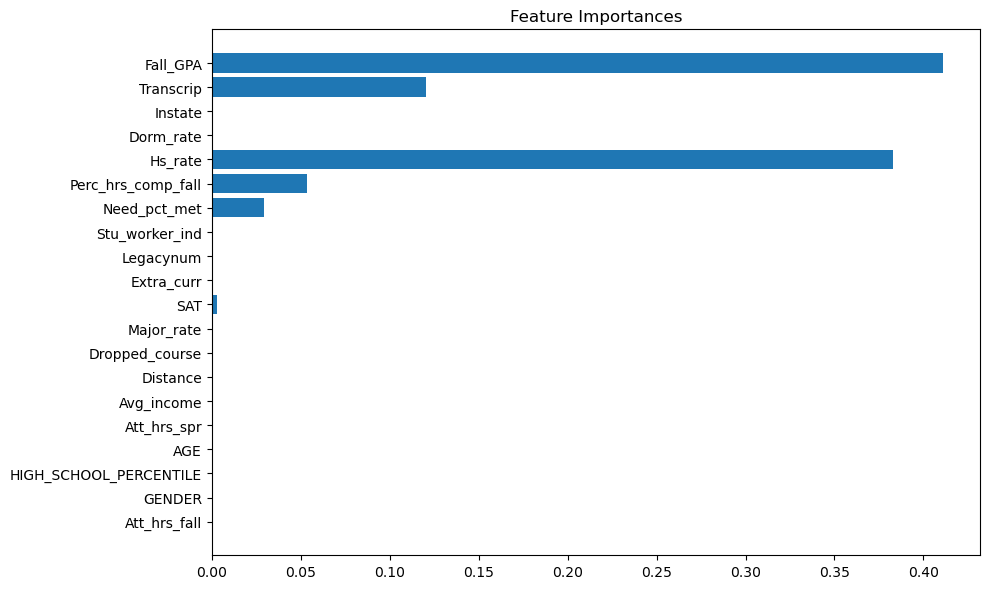

In [297]:
# Feature importances
importances = model.feature_importances_
feature_names = x.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code visualizes **feature importances** from the trained Decision Tree model:

- `model.feature_importances_`: Measures how much each feature contributes to the decision-making.

- Creates a **horizontal bar chart** with:

    - Features on the y-axis (`feature_names`)

    - Their importance scores on the x-axis (`importances`)

- Helps identify which features are **most influential** in predicting the target variable.

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;"> 
    <h2 style="color:#33691e; margin-top:0;">Feature Importances Interpretation</h2>

- This bar chart displays the **feature importances** derived from the Decision Tree Classifier model. Each bar quantifies the relative contribution of a variable to the model’s predictive decisions; higher values indicate greater influence on how the tree splits the data and classifies observations.

- In this particular model, **Fall_GPA** stands out as the most influential predictor by a significant margin. This suggests that students' academic performance during the fall semester plays a crucial role in determining the target outcome, which is likely related to student success, retention, or progression.

- The second most important feature is **Hs_rate**, which likely represents a student's high school completion or performance rate. Its strong influence highlights the importance of pre-college academic readiness. The transcript also contributes meaningfully, indicating that prior academic records (e.g., grades or course history) help the model make more accurate predictions.

- A few other features, such as Perc_hrs_comp_fall (percentage of credit hours completed in the fall) and Need_pct_met (percentage of financial need met) have moderate importance. These variables may reflect aspects of academic engagement and financial stability.

- Conversely, many features, including SAT, Major_rate, Dropped_course, Distance, Avg_income, and demographic variables like AGE, GENDER, and HIGH_SCHOOL_PERCENTILE, contribute very little or not at all to the model’s decisions. This implies that they were rarely used in decision splits and had minimal impact on prediction outcomes.

- In conclusion, the model’s behavior indicates a strong reliance on academic performance indicators, particularly Fall_GPA, Hs_rate, and Transcript, as key predictors. In contrast, demographic and background variables played a negligible role. These insights can guide both predictive modeling efforts and institutional strategies for early intervention by emphasizing academic achievement as the most critical determinant of student outcomes.
</div>

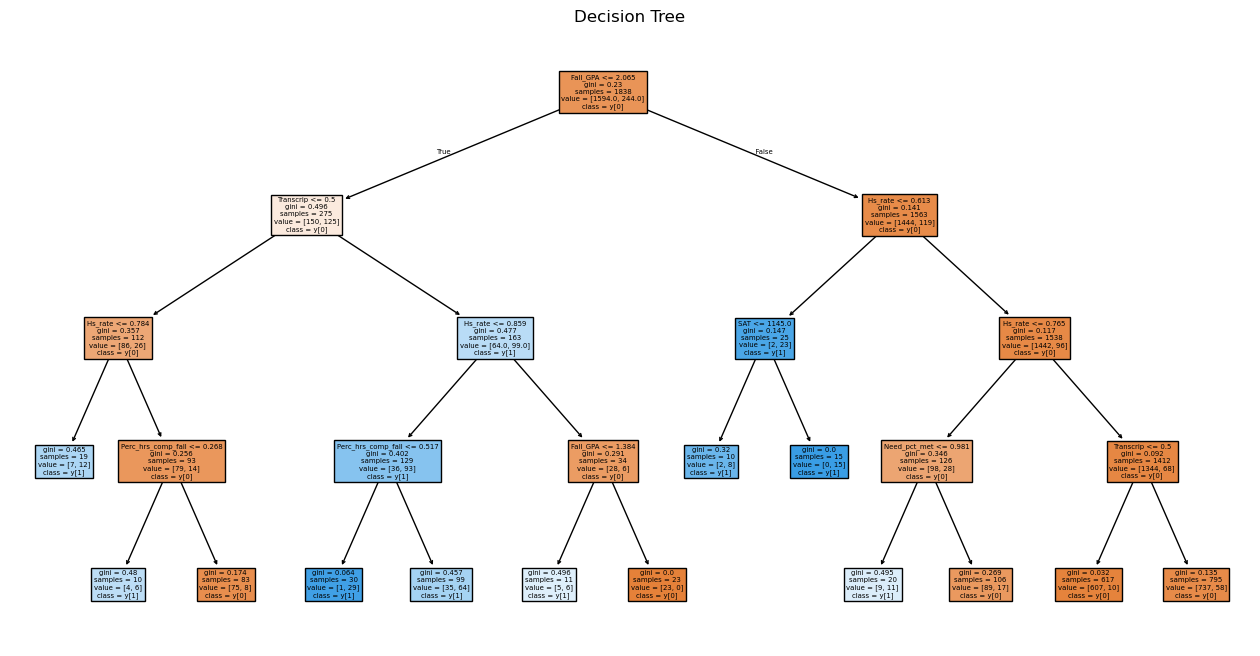

In [301]:
# Visualize the decision tree
plt.figure(figsize=(16, 8))
plot_tree(model, feature_names=x.columns, class_names=True, filled=True)
plt.title("Decision Tree")
plt.savefig('decision_tree.png')  # Save tree
plt.show()

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code **visualizes the trained Decision Tree**:

- `plot_tree()` draws the structure of the decision tree:

    - Shows splits, thresholds, and predicted classes.

    - `filled=True` adds color based on class purity.

    - `feature_names` and `class_names=True` label the nodes clearly.

- `plt.savefig()` saves the tree as an image (`decision_tree.png`).

- `plt.show()` displays the tree inline.

It helps us **interpret how the model makes decisions** based on different features.

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;"> 
    <h2 style="color:#33691e; margin-top:0;">Decision tree Interpretation</h2>
    
- This decision tree shows how the model predicts **student outcomes** based on key variables. The most important split is **Fall_GPA**, indicating that fall semester academic performance is the strongest predictor.

- Students with lower Fall GPA are more likely classified into **class 0** (e.g., at risk), while those with higher GPA tend to fall into **class 1** (e.g., successful). The model then uses **Hs_rate** (high school performance) and **Transcript** to further refine predictions.

- Other factors like percentage of completed fall hours, SAT scores, and financial need met appear in lower branches, suggesting they have **secondary influence**.

- In summary, the tree emphasizes **academic performance** as the main driver of student outcomes, with other factors playing smaller supporting roles.

</div>

## 3.5 Confusion Matrix

In [305]:
# Calculate the confusion matrix to evaluate classification model performance
cm = confusion_matrix(y_val, y_val_pred)
tn, fp, fn, tp = cm.ravel()

print(f"True Negatives (TN): {tn} \nTrue Positives (TP): {tp} \nFalse Positives (FP): {fp} \nFalse Negatives (FN): {fn} ")

True Negatives (TN): 669 
True Positives (TP): 44 
False Positives (FP): 29 
False Negatives (FN): 46 


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code calculates and displays the **confusion matrix** for the model's predictions:

- `confusion_matrix(y_val, y_val_pred)` creates a 2×2 table comparing actual vs. predicted labels.

- `ravel()` unpacks the values into:

    - **TN**: True Negatives, which correctly predicted class 0

    - **TP**: True Positives, which  correctly predicted class 1

    - **FP**: False Positives, which predicted 1 but actually 0

    - **FN**: False Negatives, which predicted 0 but actually 1

These values are essential for evaluating classification performance beyond just accuracy.

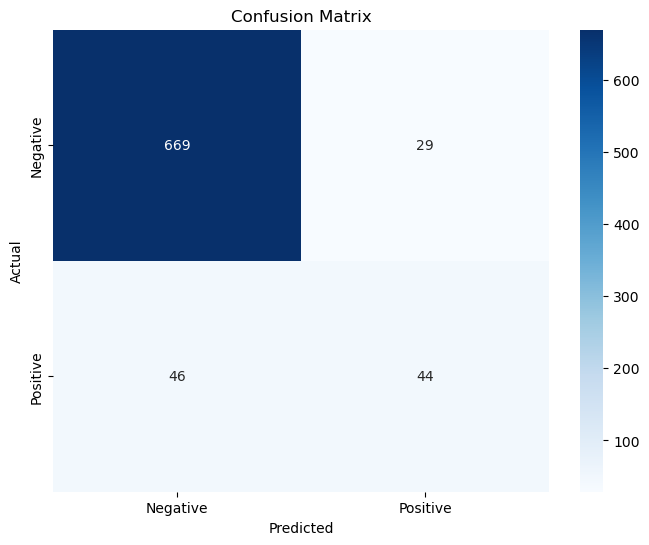

In [307]:
# Plot the confusion matrix
labels = ['Negative', 'Positive']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code creates a **heatmap visualization of the confusion matrix**:

- `sns.heatmap()` displays the matrix with:

    - `annot=True` to show values in each cell.

    - `fmt='d'` to format them as integers.

     - `xticklabels` and `yticklabels` labeled as **'Negative'** and **'Positive'**.

- Axis labels and title make the plot easy to interpret.

This visual clearly shows how well the model classified the validation data, highlighting correct vs. incorrect predictions.

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;"> 
    <h2 style="color:#33691e; margin-top:0;">Confusion Matrix Interpretation</h2>
    
This **confusion matrix** evaluates the performance of a classification model. It compares the predicted labels with the actual outcomes. The model performs well at identifying **negative cases** (high TN), but it struggles with identifying **positive ones**, only **44 out of 90** actual positives were correctly predicted. 

* **True Negatives (TN): 669**
The model correctly predicted 669 negative cases.

* **False Positives (FP): 29**
These 29 cases were incorrectly predicted as positive but were actually negative.

* **False Negatives (FN): 46**
The model missed 46 positive cases, predicting them as negative.

* **True Positives (TP): 44**
The model correctly identified 44 positive cases.

Overall, the model favors **specificity** (detecting negatives) over **sensitivity** (detecting positives).
</div>

<div style="background-color:#f1f8e9; border-left: 6px solid #689f38; padding: 15px 20px; margin: 15px 0; border-radius: 6px;">
    <h2 style="color:#33691e; margin-top:0;">4. Classification Assessment</h2>
</div>

## 4.1 Metrics

In [315]:
# Calculate Precision
precision = precision_score(y_val, y_val_pred, pos_label=1)

# Calculate Recall
recall = recall_score(y_val, y_val_pred, pos_label=1)

#Calculate F1 Score
f1 = f1_score(y_val, y_val_pred, pos_label=1)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 0.60
Recall: 0.49
F1 Score: 0.54


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code calculates key **classification performance metrics** for the **positive class (label = 1)**:

- **Precision**: Proportion of predicted positives that are actually correct - `TP / (TP + FP)`

- **Recall**: Proportion of actual positives that were correctly predicted - `TP / (TP + FN)`

- **F1 Score**: Harmonic mean of precision and recall, balances both - `2 * (Precision * Recall) / (Precision + Recall)`

These metrics give deeper insight than accuracy, especially for **imbalanced datasets**.

### 4.1.1 Draw ROC and AUC Curves

In [319]:
# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred)

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code computes the components needed to plot the **ROC curve**:

- `fpr`: False Positive Rate, proportion of actual negatives incorrectly classified as positive.

- `tpr`: True Positive Rate (Recall), proportion of actual positives correctly classified.

- `thresholds`: Decision thresholds used to classify probabilities into class labels.

### 4.1.2 Calculate the Area Under the Curve (AUC)

In [323]:
# Computing AUC
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.2f}")

AUC: 0.72


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code calculates the **AUC (Area Under the ROC Curve)**:

- `auc(fpr, tpr)` computes the area under the curve formed by plotting **TPR vs. FPR**.

The printed value (`roc_auc`) summarizes the model’s overall **ability to distinguish between classes**.

### 4.1.3 Plot the ROC curve

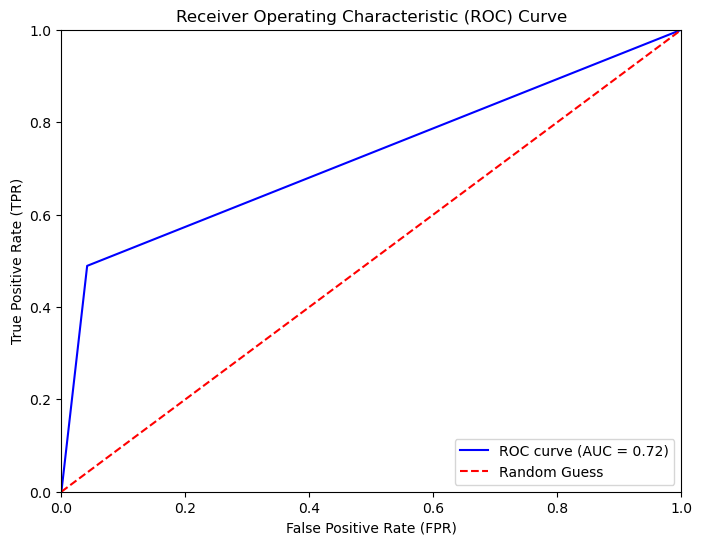

In [327]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code plots the **ROC (Receiver Operating Characteristic) curve**:

- **Blue line**: Actual ROC curve of your model, showing the trade-off between TPR (sensitivity) and FPR.

- **Red dashed line**: Represents a random guess (baseline model).

- **AUC value** in the legend indicates how well the model distinguishes between the classes.

- Axis limits and labels clarify interpretation.

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;">
    <h2 style="color:#33691e; margin-top:0;">Receiver Operating Charasteristic (ROC) Curve Interpretation</h2>

- The blue curve represents the **ROC curve** of the model being evaluated. It shows the relationship between the **True Positive Rate (TPR)** on the Y-axis and the **False Positive Rate (FPR)** on the X-axis, across different classification thresholds. The dashed red line represents a random guess classifier (i.e., one with no predictive power), which serves as a baseline.

- The **Area Under the Curve (AUC)** value is **0.72**. This means that the model has a **moderate ability** to distinguish between the two classes. Specifically, there is a **72% chance** that the model will correctly rank a randomly chosen positive instance higher than a randomly chosen negative instance.
</div>

## 4.2 Generate Table of Metrics

In [332]:
metrics_df = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1 Score", "Validation Accuracy", "Misclassification Rate", "Sum of Squared Errors (SSE)", "Average Squared Error (ASE)", "Area Under the Curve (AUC)"],
    "Value": [precision, recall, f1, acc_val, misclass_val, SSE, ASE, roc_auc]
})

metrics_df

,Metric,Value
0,Precision,0.602740
1,Recall,0.488889
2,F1 Score,0.539877
3,Validation Accuracy,0.904822
4,Misclassification Rate,0.095178
5,Sum of Squared Errors (SSE),75.000000
6,Average Squared Error (ASE),0.095178
7,Area Under the Curve (AUC),0.723671


<div style="background-color: #e0f7fa; padding: 15px; border-radius: 8px;">

This code creates a clean summary table of key **model evaluation metrics**:

- Uses a `pandas DataFrame` called `metrics_df` with two columns:

    - **Metric**: The name of each performance metric.

    - **Value**: The corresponding computed value.

Metrics included:

- **Precision, Recall, F1 Score**: Measure classification quality.

- **Validation Accuracy, Misclassification Rate**: Basic model performance.

- **SSE and ASE**: Error counts.

- **AUC**: Overall classification ability.

Displaying `metrics_df` provides a **clear, consolidated overview** of our Decision Tree model's performance.

<div style="background-color: #f1f8e9; padding: 15px; border-radius: 8px;">
    <h2 style="color:#33691e; margin-top:0;">Model Summary</h2>

- The model achieved a **validation accuracy** of approximately **90.5%**, meaning that it correctly predicted the outcome in most cases. However, while this may suggest strong performance at first glance, accuracy alone can be misleading, especially in situations where the dataset may be **imbalanced**. A deeper examination of other key metrics offers a more nuanced view.

- **Precision** was measured at 0.603, indicating that about **60.3%** of the cases the model identified as positive were actually correct. On the other hand, **recall** was lower, at 0.489. This means the model correctly identified only **48.9%** of all actual positive cases, suggesting it is missing a significant portion of true positives. The **F1 Score**, which combines both precision and recall into a single metric, was **0.540**, reflecting a moderate balance between capturing true positives and avoiding false positives.

- Additional error metrics, such as the **Sum of Squared Errors (75.0)** and the **Average Squared Error (0.095)**, indicate that the overall prediction errors are relatively low. These values suggest that the model’s predictions are fairly close to the actual outcomes on average. Furthermore, the **misclassification rate** was **9.5%**, which aligns with the high overall accuracy.

- One of the most informative metrics in evaluating binary classifiers is the Area Under the Curve (AUC) of the Receiver Operating Characteristic (ROC) curve. The model's **AUC score** was 0.724. This means there is a **72.4% chance** that the model will correctly distinguish a randomly chosen positive instance from a negative one. While this is significantly better than random guessing, it falls within a range typically considered **moderate**, indicating the model has room for improvement in class discrimination.

- In summary, the model performs well in terms of **general classification accuracy** and shows reasonable overall predictive capability. However, its limited recall reveals a key weakness: it fails to detect a considerable number of true positive cases. This trade-off may be acceptable in some contexts, but in domains where **false negatives are particularly costly**, such as medical diagnoses or fraud detection, it is crucial to improve the model’s **sensitivity**.

</div>